In [1]:
import os
import sys
from collections import OrderedDict
sys.path.append("../..")
import spatialpy
spatialpy.__file__
import matplotlib.pyplot as plt
import numpy
%load_ext autoreload
%autoreload 2

In [2]:
class Teleport(spatialpy.BoundaryCondition):
    def expression(self):
        return """
        if(isnan(me->x[0]) || me->x[0] > system->xhi){
            me->x[0] = system->xlo + 0.55;
        }
        if(isnan(me->x[1]) || me->x[1] > system->yhi){
            me->x[1] = system->yhi;
        }
        me->x[2] = 0;
        me->rho = 250.0;
        """

In [3]:
class HardFloor(spatialpy.BoundaryCondition):
    def expression(self):
        return """
        if(me->x[1] < 0.4){
            me->x[1] = 0.5;
            me->v[1] = 0.0;
        }
        """

In [4]:
class HardWall(spatialpy.BoundaryCondition):
    def expression(self):
        return """
        if(me->x[0] < 1){
            me->x[0] = system->xlo + 0.5;
            me->v[1] = 0.0;
        }
        """

In [5]:
class weir(spatialpy.Model):
    def __init__(self, model_name="weir_aka_backward_facing_step"):
        spatialpy.Model.__init__(self, model_name)

        xmax = 50.1
        ymax = 10.1

        # Construct mesh for backward facing step
        self.mesh = spatialpy.Mesh(0, xlim=(0,xmax), ylim=(0,ymax), zlim=(0,0), gravity=[0,-1,0])
        for x in numpy.arange(start=0, stop=xmax, step=0.1):
            for y in numpy.arange(start=0, stop=ymax, step=0.1):
                # Top and bottom
                if y == 0 or y == 10:
                    self.mesh.add_point([x,y,0], type=1, mass=10.0, vol=1.0, nu=1.0, fixed=True)
                # Water
                elif y > 1.5 and y < 8 and x > 1.5 and x < 8:
                    self.mesh.add_point([x,y,0], type=2, mass=1.0, vol=0.001, nu=1.0, fixed=False)
                # Step
                elif x >= 10 and x <= 15 and y > 0 and y < 5:
                    self.mesh.add_point([x,y,0], type=1, mass=10.0, vol=1.0, nu=1.0, fixed=True)
                # Walls 
                elif x == 0 or x == 50:
                    self.mesh.add_point([x,y,0], type=1, mass=10.0, vol=1.0, nu=1.0, fixed=True)


        # Teleport particles back to start to simulate flow
        self.add_boundary_condition(Teleport())
        self.add_boundary_condition(HardFloor())
        #self.add_boundary_condition(HardWall())
        # Velocity
        #self.add_boundary_condition(spatialpy.BoundaryCondition(
        #    type_id=2,
        #    property = 'v',
        #   value    = [0.005, 0.0, 0.0] 
        #))

        self.staticDomain = False

        # Define time parameters
        self.timestep_size = 1e-4  # timestep size
        #self.num_timesteps = 50000    # number of timesteps
        #self.num_timesteps = 200000    # number of timesteps
        #self.output_freq = 400      # frequency of outputting results
        self.num_timesteps = 500    # number of timesteps
        self.output_freq = 5      # frequency of outputting results
        

In [6]:
model = weir()

In [29]:
from spatialpy import Solver
sol = Solver(model, debug_level=0)
%time sol.compile()

CPU times: user 1.99 s, sys: 12.1 ms, total: 2 s
Wall time: 50.7 s


In [30]:
%time result = sol.run()

cmd = cd /tmp/spatialpy_result_zo9_ogez;/tmp/spatialpy_build_di682a8l/ssa_sdpd
got here1-
ERROR: nan/inf detected!!!
id=256
x[0]=5.500000e-01
x[1]=5.000000e-01
x[2]=0.000000e+00
v[0]=-nan
v[1]=-nan
v[2]=-nan
vt[0]=0.000000e+00
vt[1]=0.000000e+00
vt[2]=0.000000e+00
F[0]=-2.840301e+45
F[1]=1.434893e+10
F[2]=2.333126e+39
Fbp[0]=4.754546e+18
Fbp[1]=-1.132733e+04
Fbp[2]=0.000000e+00
old_x[0]=5.500000e-01
old_x[1]=5.000000e-01
old_x[2]=0.000000e+00
old_v[0]=2.352042e+20
old_v[1]=-6.866098e+18
old_v[2]=-1.932052e+14
sys->current_step=0
sys->dt=1.000000e-04
got here2
got here3
CPU times: user 12.5 ms, sys: 4.37 ms, total: 16.9 ms
Wall time: 2min 25s


In [31]:
def mpl_plot_property(t_ndx=0):
        import matplotlib.pyplot as plt
        
        points, data = result.read_step(t_ndx)

        d = data["type"]

        plt.figure(figsize=(6.4, 4.8))
        plt.scatter(points[:,0],points[:,1], c=d)
        plt.axis('scaled')
        #plt.colorbar()
        plt.title("t={0}".format(t_ndx))
        plt.grid(linestyle='', linewidth=1)
        plt.plot()
        return

In [32]:
timespan = []
time_vals = []
for i,t in enumerate(result.get_timespan()):
    time_vals.append(t)
    timespan.append(i)
print(timespan)
print(time_vals)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[0.0, 0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045000000000000005, 0.005, 0.0055000000000000005, 0.006, 0.006500000000000001, 0.007, 0.007500000000000001, 0.008, 0.0085, 0.009000000000000001, 0.0095, 0.01, 0.0105, 0.011000000000000001, 0.0115, 0.012, 0.0125, 0.013000000000000001, 0.0135, 0.014, 0.0145, 0.015000000000000001, 0.0155, 0.016, 0.0165, 0.017, 0.0175, 0.018000000000000002, 0.018500000000000003, 0.019, 0.0195, 0.02, 0.0205, 0.021, 0.021500000000000002, 0.022000000000000002, 0.022500000000000003, 0.023, 0.0235, 0.024, 0.0245, 0.025, 0.025500000000000002, 0.02600000000

<ipython-input-31-24cf2a5d66bd>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6.4, 4.8))


t=29 [Errno 2] No such file or directory: '/tmp/spatialpy_result_zo9_ogez/output145.vtk'
t=30 [Errno 2] No such file or directory: '/tmp/spatialpy_result_zo9_ogez/output150.vtk'
t=31 [Errno 2] No such file or directory: '/tmp/spatialpy_result_zo9_ogez/output155.vtk'
t=32 [Errno 2] No such file or directory: '/tmp/spatialpy_result_zo9_ogez/output160.vtk'
t=33 [Errno 2] No such file or directory: '/tmp/spatialpy_result_zo9_ogez/output165.vtk'
t=34 [Errno 2] No such file or directory: '/tmp/spatialpy_result_zo9_ogez/output170.vtk'
t=35 [Errno 2] No such file or directory: '/tmp/spatialpy_result_zo9_ogez/output175.vtk'
t=36 [Errno 2] No such file or directory: '/tmp/spatialpy_result_zo9_ogez/output180.vtk'
t=37 [Errno 2] No such file or directory: '/tmp/spatialpy_result_zo9_ogez/output185.vtk'
t=38 [Errno 2] No such file or directory: '/tmp/spatialpy_result_zo9_ogez/output190.vtk'
t=39 [Errno 2] No such file or directory: '/tmp/spatialpy_result_zo9_ogez/output195.vtk'
t=40 [Errno 2] No suc

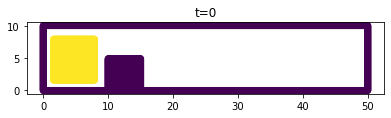

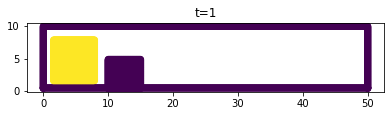

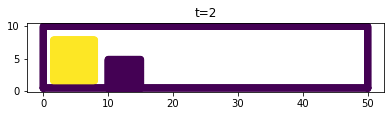

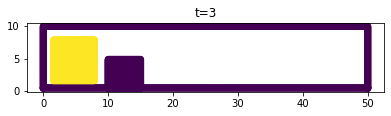

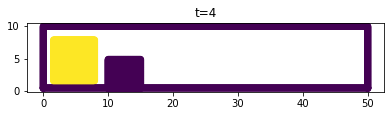

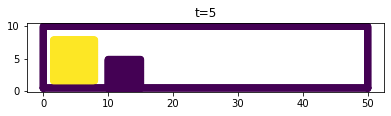

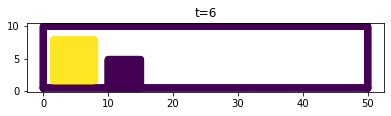

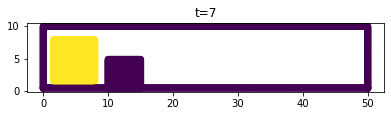

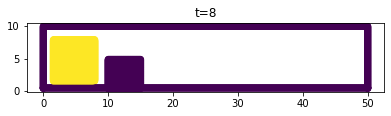

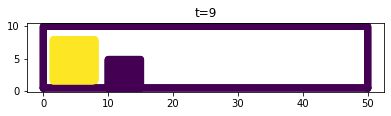

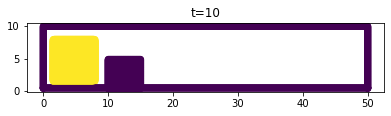

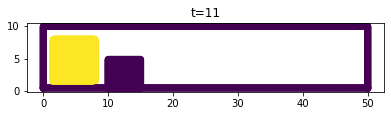

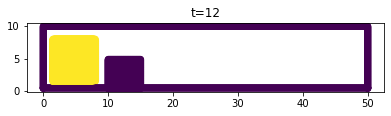

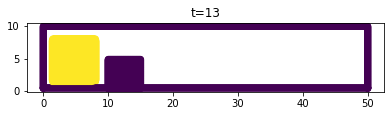

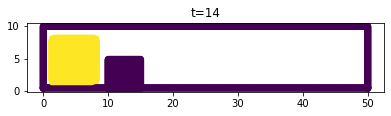

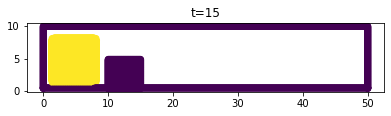

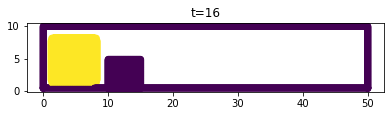

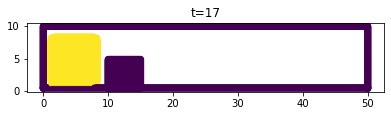

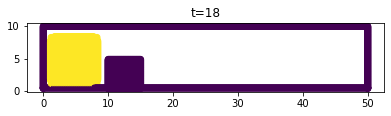

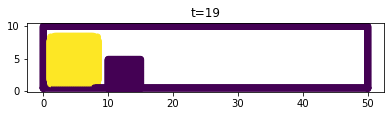

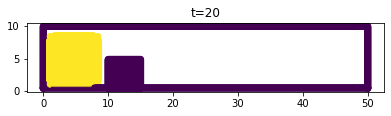

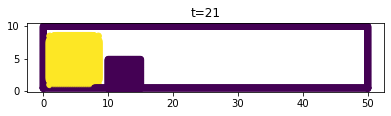

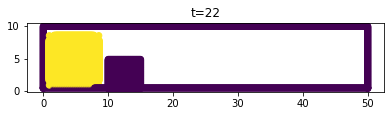

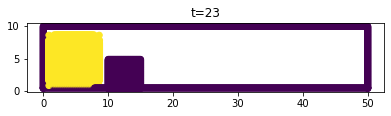

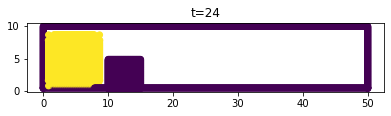

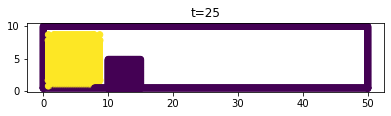

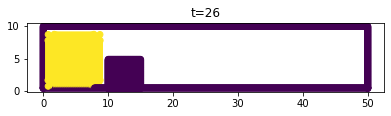

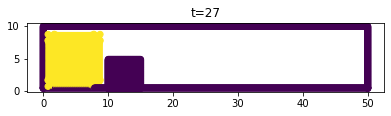

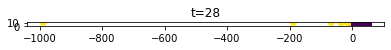

In [33]:
for i in timespan:
    try:
        mpl_plot_property(i)
    except Exception as e:
        print("t={0} {1}".format(i,e))
